In [6]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
import itertools
import contractions
import re
import ftfy
import pandas as pd

In [7]:
def clean_text(text):
    #remove html meta data garbage
    text=BeautifulSoup(text,"lxml")
    text=text.get_text()
    #remove words with prefix @
    text=re.sub(r"@[a-zA-Z0-9_]+","",text)
    #remove url links
    text=re.sub(r"(^http[^ ]+|^pic.[^ ]+|^www[^ ]+)","",text)
    #fix wrongly encoded text
    text=ftfy.fix_text(text)
    #shorten words having long consecutive(redundant) characters
    text=re.sub(r'(.)\1+', r'\1\1', text)
    #text=''.join(g[0] for g in itertools.groupby(text))
    #remove punctuation
    text=re.sub(r'[^\w\s]'," ",text).strip()
    #remove extra white spaces
    text=re.sub(' +', " ",text)
    #expand words
    text=contractions.fix(text)
    #spell correction
    tokens=word_tokenize(text)
    tokens=[str(TextBlob(token).correct()) if Word(token).spellcheck()[0][1] == 1 else token for token in tokens]
    #stem words
    wl=WordNetLemmatizer()
    tokens=[wl.lemmatize(token) for token in tokens]
    text=" ".join(tokens)   
    #lowercase the words
    text=text.lower()
    return text

In [8]:
df=pd.read_csv("complete_dataset.csv",index_col=[0])
df.head()

,sentiment,tweet
0,0,Meh... Almost Lover is the exception... this t...
1,0,wonders why someone that u like so much can ma...
2,0,@gigdiary I know - was a little depressed tha...
3,0,@Horrors_Wench Me toooooo! I feel like I've be...
4,0,Need's help with this anxiety crap


In [9]:
df.loc[:,"tweet"]=df.tweet.apply(lambda x: clean_text(x))

In [47]:
df.to_csv("cleaned_set.csv")

### Visualization

In [200]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [43]:
df=pd.read_csv("cleaned_set.csv",index_col=[0])
df=df.dropna()

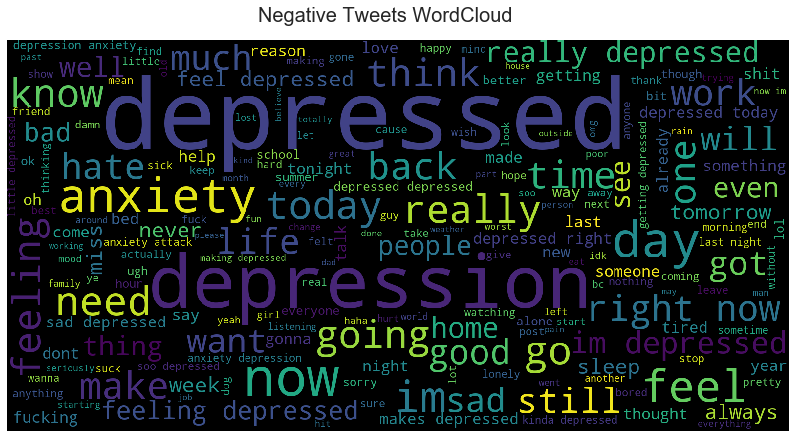

In [44]:
negative=df[df["sentiment"]==0]
doc=" ".join(negative["tweet"])
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(doc)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud,interpolation="nearest")
plt.figtext(.5,.8,'Negative Tweets WordCloud', fontsize=20, ha='center')
plt.axis("off")
plt.show()

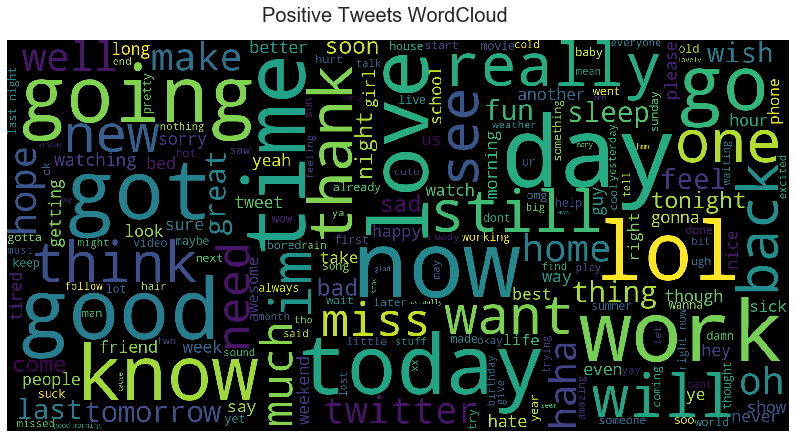

In [45]:
positive=df[df["sentiment"]==1]
doc1=" ".join(positive["tweet"])
wordcloud1=WordCloud(width=1600,height=800,max_font_size=200).generate(doc1)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud1,interpolation="nearest")
plt.axis("off")
plt.figtext(.5,.8,'Positive Tweets WordCloud', fontsize=20, ha='center')
plt.show()

In [ ]:
#pos tagging
blob=TextBlob(negative["tweet"].to_string(index=False))
datframe=pd.DataFrame(blob.tags,columns=["word","pos"])
datframe=datframe.pos.value_counts()[:10]
#plot bar
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sn.barplot(datframe.index,datframe.values,alpha=0.8)
plt.title("Top Negative POS Taggings")
plt.ylabel("Count", fontsize=12)
plt.xlabel("POS", fontsize=12)


blob=TextBlob(positive["tweet"].to_string(index=False))
datframe=pd.DataFrame(blob.tags,columns=["word","pos"])
datframe=datframe.pos.value_counts()[:10]
plt.subplot(1,2,2)
sn.barplot(datframe.index,datframe.values,alpha=0.8)
plt.title("Top Positive POS Taggings")
plt.ylabel("Count", fontsize=12)
plt.xlabel("POS", fontsize=12)

plt.show()

In [168]:
ps=PorterStemmer()
ps.stem("anxiety")

'anxieti'